## Workshop - Task 1 : Predict the percentage of a student based on the number of study hours.
### Author: Anupam kakati

## The Sparks Foundation

In [23]:
# Importig the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
import warnings as wgs

# Load the Student Score dataset
student_score = pd.read_csv("student_scores - student_scores.csv")

### Checking top 5 rows of data

In [3]:
student_score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Checking bottom 5 rows of data

In [6]:
student_score.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### Shape and the info of the dataframe
#### Checking for the dimension, null-values and other summery of the dataframe

In [7]:
student_score.shape

(25, 2)

In [8]:
student_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
student_score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualization

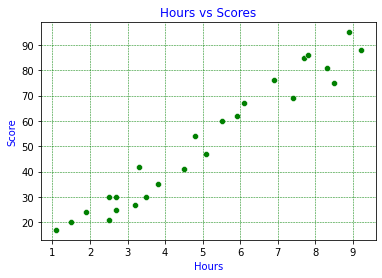

In [24]:
wgs.filterwarnings("ignore")
sns.scatterplot("Hours","Scores",data=student_score, color='g')
plt.title("Hours vs Scores", color='b')
plt.xlabel("Hours", color='b')
plt.ylabel("Score", color='b')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

### Preparing the Data

In [26]:
X = student_score.iloc[:, :-1].values
y = student_score.iloc[:, 1].values

In [27]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [30]:
print('X_train is', X_train.shape)
print('y_train is', y_train.shape)
print('X_test is', X_test.shape)
print('y_test is', y_test.shape)

X_train is (20, 1)
y_train is (20,)
X_test is (5, 1)
y_test is (5,)


### Training the Algorithm

In [31]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


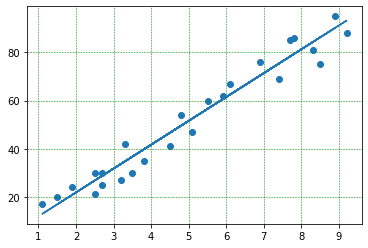

In [44]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

In [36]:
print(X_test) # Testing data - In Hours
pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [38]:
# Comparing Actual vs Predicted
student_score = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
student_score

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [40]:
# testing with given data
hrs = 9.25
own_pred = regressor.predict([[hrs]])
print("If the person studied for",hrs,"hours, The Predicted Score is",own_pred[0])

If the person studied for 9.25 hours, The Predicted Score is 93.69173248737538


### Evaluating the Model

In [43]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test,pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,pred))

Mean Squared Error: 21.5987693072174
Mean Absolute Error: 4.183859899002975
